### XGBoost

In [2]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040


[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4]	eval-rmse:71.80880	train-rmse:76.06532
[5]	eval-rmse:71.53908	train-rmse:75.70437
[6]	eval-rmse:71.25887	train-rmse:75.33864
[7]	eval-rmse:70.99426	train-rmse:74.97820


/usr/local/lib/python3.11/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[8]	eval-rmse:70.73045	train-rmse:74.62795
[9]	eval-rmse:70.49050	train-rmse:74.28277
[10]	eval-rmse:70.24539	train-rmse:73.94244
[11]	eval-rmse:70.00295	train-rmse:73.60703
[12]	eval-rmse:69.76562	train-rmse:73.27638
[13]	eval-rmse:69.52100	train-rmse:72.94524
[14]	eval-rmse:69.27481	train-rmse:72.62546
[15]	eval-rmse:69.00998	train-rmse:72.30320
[16]	eval-rmse:68.78755	train-rmse:71.98529
[17]	eval-rmse:68.55737	train-rmse:71.66870
[18]	eval-rmse:68.30442	train-rmse:71.35914
[19]	eval-rmse:68.10443	train-rmse:71.05081
[20]	eval-rmse:67.88706	train-rmse:70.74940
[21]	eval-rmse:67.65367	train-rmse:70.45212
[22]	eval-rmse:67.42270	train-rmse:70.15550
[23]	eval-rmse:67.19717	train-rmse:69.86623
[24]	eval-rmse:67.01190	train-rmse:69.57727
[25]	eval-rmse:66.81070	train-rmse:69.29541
[26]	eval-rmse:66.59461	train-rmse:69.01777
[27]	eval-rmse:66.38446	train-rmse:68.73771
[28]	eval-rmse:66.20101	train-rmse:68.46290
[29]	eval-rmse:65.99730	train-rmse:68.19026
[30]	eval-rmse:65.76237	train-rmse

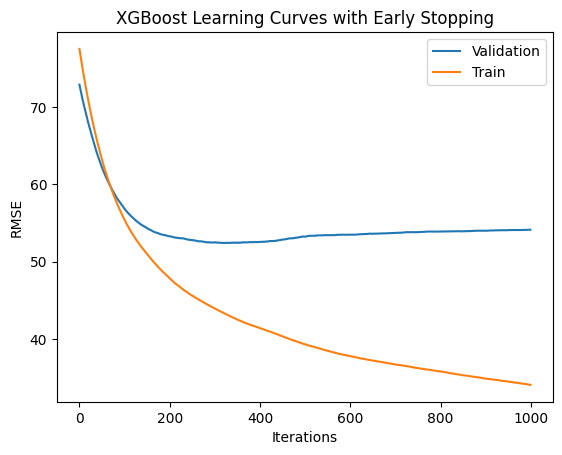

In [6]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data and split
data = load_diabetes()
X = data.data
y = data.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Parameters for XGBoost
param = {'max_depth': 3, 'eta': 0.01, 'objective': 'reg:squarederror'}

# Train the model with early stopping
num_round = 1000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]
evals_result = {}  # Initialize an empty dictionary to store results
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10, evals_result=evals_result)

# Plotting the learning curves
epochs = len(evals_result['eval']['rmse'])
x_axis = range(0, epochs)
plt.figure()
plt.plot(x_axis, evals_result['eval']['rmse'], label='Validation')
plt.plot(x_axis, evals_result['train']['rmse'], label='Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.title('XGBoost Learning Curves with Early Stopping')
plt.show()



In [14]:
import pandas as pd
evals_result.keys()

dict_keys(['eval', 'train'])

In [19]:
results_df = pd.DataFrame([evals_result['eval']['rmse'],evals_result['train']['rmse']]).T

In [20]:
results_df['diff'] = results_df[0] - results_df[1]

In [23]:
results_df[results_df['diff'] < 0.01]

,0,1,diff
0,72.930889,77.563037,-4.632147
1,72.643776,77.180398,-4.536622
2,72.361093,76.803274,-4.442181
3,72.082784,76.431603,-4.348818
4,71.808797,76.065323,-4.256526
...,...,...,...
64,60.292083,60.532969,-0.240886
65,60.173519,60.360002,-0.186483
66,60.064582,60.194993,-0.130410
67,59.941553,60.024619,-0.083066


In [24]:
bst.best_ntree_limit = 67


In [25]:
predictions = bst.predict(dvalid)


In [27]:
predictions

array([159.18893 , 206.27591 , 175.22429 , 295.9157  , 125.61823 ,
       128.06154 , 257.15338 , 211.338   , 149.00725 , 154.41249 ,
       104.102036, 196.0869  ,  91.59793 , 239.47511 , 118.52005 ,
       111.4021  , 229.35774 , 256.7412  , 185.72925 , 235.24536 ,
       186.84236 ,  96.88423 ,  70.414986, 199.52876 , 152.07    ,
       187.21767 , 204.85905 , 196.00319 ,  72.606544, 108.55862 ,
       180.78674 , 118.76349 , 146.50636 , 183.84616 , 149.25348 ,
       187.11473 , 112.96919 , 114.76101 , 184.28674 ,  68.52865 ,
        67.98585 ,  83.91956 , 174.2202  , 185.96986 , 180.46988 ,
        79.47412 , 100.26168 , 112.16302 ,  73.11136 , 164.4933  ,
       124.60371 ,  82.27981 , 140.3247  , 100.12516 , 195.36021 ,
       146.1376  ,  96.57848 , 232.90302 ,  89.81601 ,  89.82054 ,
       174.07098 , 185.5151  , 127.16104 ,  85.30461 , 122.92981 ,
       234.15456 , 162.96346 , 181.43661 , 151.00249 , 112.90678 ,
       161.7822  , 192.78462 , 239.39641 ,  97.16356 ,  87.351

In [28]:
best_iteration = bst.best_iteration
print(f"Best iteration: {best_iteration}")

Best iteration: 999


### XGBoost with Additional Params

[0]	eval-rmse:72.91122	train-rmse:77.62505
[1]	eval-rmse:72.68601	train-rmse:77.30581
[2]	eval-rmse:72.38099	train-rmse:76.92980
[3]	eval-rmse:72.13152	train-rmse:76.63108
[4]	eval-rmse:71.91308	train-rmse:76.27968
[5]	eval-rmse:71.65499	train-rmse:75.93592
[6]	eval-rmse:71.38906	train-rmse:75.59921
[7]	eval-rmse:71.12733	train-rmse:75.29746
[8]	eval-rmse:70.83051	train-rmse:74.96197
[9]	eval-rmse:70.60977	train-rmse:74.65740
[10]	eval-rmse:70.41571	train-rmse:74.32797
[11]	eval-rmse:70.13324	train-rmse:73.98002
[12]	eval-rmse:69.93475	train-rmse:73.67220
[13]	eval-rmse:69.65156	train-rmse:73.34252
[14]	eval-rmse:69.45741	train-rmse:73.05109
[15]	eval-rmse:69.20270	train-rmse:72.72354
[16]	eval-rmse:68.95054	train-rmse:72.46135
[17]	eval-rmse:68.75625	train-rmse:72.16616
[18]	eval-rmse:68.50591	train-rmse:71.86140
[19]	eval-rmse:68.23838	train-rmse:71.53546
[20]	eval-rmse:67.97588	train-rmse:71.22011
[21]	eval-rmse:67.74984	train-rmse:70.90573
[22]	eval-rmse:67.48982	train-rmse:70.6360

/usr/local/lib/python3.11/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[25]	eval-rmse:66.90446	train-rmse:69.90887
[26]	eval-rmse:66.71168	train-rmse:69.62072
[27]	eval-rmse:66.49487	train-rmse:69.35200
[28]	eval-rmse:66.28678	train-rmse:69.07537
[29]	eval-rmse:66.11538	train-rmse:68.79984
[30]	eval-rmse:65.89030	train-rmse:68.53135
[31]	eval-rmse:65.68578	train-rmse:68.27290
[32]	eval-rmse:65.47228	train-rmse:68.00516
[33]	eval-rmse:65.28551	train-rmse:67.75740
[34]	eval-rmse:65.08332	train-rmse:67.48967
[35]	eval-rmse:64.88273	train-rmse:67.24296
[36]	eval-rmse:64.66088	train-rmse:66.96934
[37]	eval-rmse:64.44432	train-rmse:66.69464
[38]	eval-rmse:64.24504	train-rmse:66.43612
[39]	eval-rmse:63.99756	train-rmse:66.17684
[40]	eval-rmse:63.82602	train-rmse:65.92251
[41]	eval-rmse:63.67260	train-rmse:65.66036
[42]	eval-rmse:63.47818	train-rmse:65.44481
[43]	eval-rmse:63.31670	train-rmse:65.20631
[44]	eval-rmse:63.11990	train-rmse:64.96102
[45]	eval-rmse:62.97047	train-rmse:64.74079
[46]	eval-rmse:62.84142	train-rmse:64.51103
[47]	eval-rmse:62.66553	train-rm

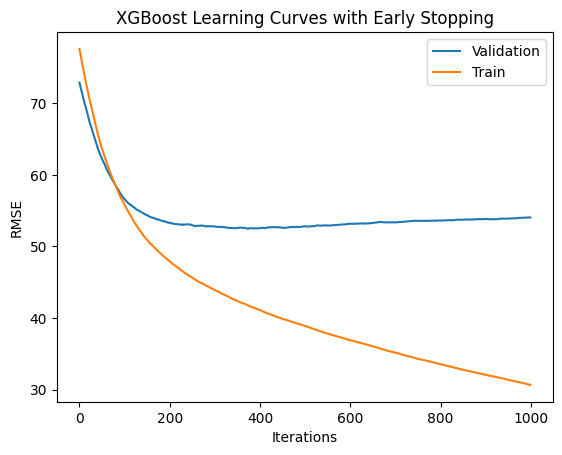

In [29]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data and split
data = load_diabetes()
X = data.data
y = data.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Parameters for XGBoost with added regularization and other hyperparameters
param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror',
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'alpha': 0.1,
    'lambda': 1
}

# Train the model with early stopping
num_round = 1000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]
evals_result = {}  # Initialize an empty dictionary to store results
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=50, evals_result=evals_result)

# Plotting the learning curves
epochs = len(evals_result['eval']['rmse'])
x_axis = range(0, epochs)
plt.figure()
plt.plot(x_axis, evals_result['eval']['rmse'], label='Validation')
plt.plot(x_axis, evals_result['train']['rmse'], label='Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.title('XGBoost Learning Curves with Early Stopping')
plt.show()


### Custom Early Stopping

[0]	eval-rmse:72.93089	train-rmse:77.56304


[0]	eval-rmse:72.93089	train-rmse:77.56304


/usr/local/lib/python3.11/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[1]	eval-rmse:72.64378	train-rmse:77.18040
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4]	eval-rmse:71.80880	train-rmse:76.06532
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4]	eval-rmse:71.80880	train-rmse:76.06532
[5]	eval-rmse:71.53908	train-rmse:75.70437
[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4]	eval-rm

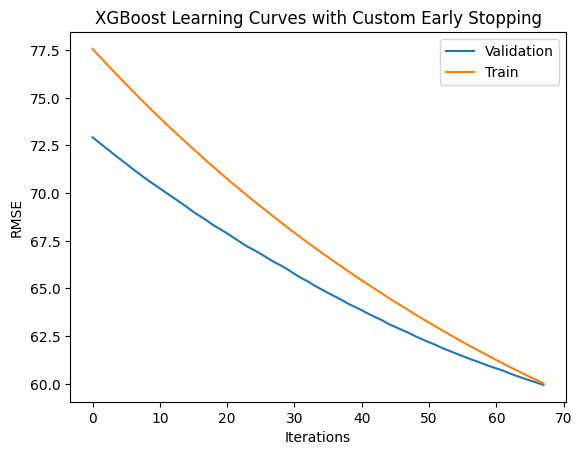

In [32]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data and split
data = load_diabetes()
X = data.data
y = data.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Parameters for XGBoost
param = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror'
}

num_round = 1000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]
evals_result = {}
threshold_difference = 0.1  # example threshold

for i in range(1, num_round + 1):
    bst = xgb.train(param, dtrain, i, evallist, evals_result=evals_result)
    diff = abs(evals_result['train']['rmse'][-1] - evals_result['eval']['rmse'][-1])
    
    if diff < threshold_difference:
        print(f"Stopping early at iteration {i} due to difference of {diff:.2f} between train-rmse and eval-rmse.")
        break

# Plotting the learning curves
epochs = len(evals_result['eval']['rmse'])
x_axis = range(0, epochs)
plt.figure()
plt.plot(x_axis, evals_result['eval']['rmse'], label='Validation')
plt.plot(x_axis, evals_result['train']['rmse'], label='Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.title('XGBoost Learning Curves with Custom Early Stopping')
plt.show()


LightGBM example

In [4]:
!brew install libomp


Running `brew update --auto-update`...
==> Homebrew collects anonymous analytics.
Read the analytics documentation (and how to opt-out) here:
  https://docs.brew.sh/Analytics
No analytics have been recorded yet (nor will be during this `brew` run).

==> homebrew/core is old and unneeded, untapping to save space...
Untapping homebrew/core...
Untapped 3 commands and 6715 formulae (7,116 files, 710.7MB).
==> homebrew/cask is old and unneeded, untapping to save space...
Untapping homebrew/cask...
Untapped 4237 casks (4,352 files, 374.4MB).
==> Downloading https://formulae.brew.sh/api/formula_tap_migrations.jws.json
######################################################################### 100.0%
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
adb-enhanced                             mariadb@11.0
aerleon                                  massdriver
alass                                    medusa
apify-cli                                meson-pyth

In [34]:
pip install lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.9 MB/s eta 0:00:0000:01:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### LIGHT GBM

In [5]:
import lightgbm as lgb

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt

# Load data
data = load_diabetes()
X = data.data
y = data.target

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the datasets for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# Define the parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1
}

# Predict on the validation set
y_pred = bst.predict(X_valid, num_iteration=bst.best_iteration)

# Calculate RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE on validation set: {rmse:.2f}")





RMSE on validation set: 56.60


In [18]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train and evaluate a model
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00         1

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)
